# Ahmed Sharaf
##  Numerical Optmization 
###         1 - Implementation  Momentum


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Functions To Help Visualization

In [4]:

def theta_loss(at0, at1, c, lr):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(15, 10)
    fig.suptitle('Ahmed Sharaf')
    theta = [at0, at1]
    for x in range(len(theta)):
        ax[x].plot(theta[x], c, '-o', label=f'Theta_{x} vs. Loss')
        ax[x].set_title(f'Theta_{x} vs. Loss with learning rate={lr}')
        ax[x].set_xlabel(f'Theta_{x}')
        ax[x].set_ylabel('Loss')
        ax[x].legend()
        ax[x].grid(True)
    fig.tight_layout()

def all_curve(X, y, at0, at1):
    plt.scatter(X, y);
    for x in range(len(at0)):
        y_pred = at0[x] + at1[x] * X
        plt.plot(X, y_pred,color='red')
    # final regression line
    plt.plot(X, y_pred, linewidth=2)

    plt.title('Regression Lines at Different Stages')
    plt.xlabel('X Data')
    plt.ylabel('Y Data')
    plt.grid(True)
    
def plt_best(X, y, y_pred):
    plt.scatter(X, y, label = "Data Point")
    plt.plot(X, y_pred, color = 'red', label = "Fit Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Best Fit Curve")
    plt.legend()
    plt.grid()
    
def loss_epoch(c):
    plt.plot(c, '-o',color='red')
    plt.title('epocs vs. Loss')
    plt.xlabel('epoc')
    plt.ylabel('Loss')
    plt.grid(True)
    
def vis(X, y, y_pred, at0, at1, c, lr):
    loss_epoch(c)
    theta_loss(at0, at1, c, lr)

In [5]:
def momentum_GD(X, y, lr = 0.01, gamma = 0.9, itteration = 1000):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        y_pred = theta_0 + theta_1 * X
        
        error_vector = y_pred - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        theta_0_grad = np.sum(error_vector) / m
        theta_1_grad = np.sum(error_vector * X) / m
        
        norm_grad = np.linalg.norm(np.array([theta_0_grad, theta_1_grad]))
        
        
            
        m_t_0 = gamma * m_t_0 + lr * theta_0_grad
        m_t_1 = gamma * m_t_1 + lr * theta_1_grad
        
        theta_0 = theta_0 - m_t_0
        theta_1 = theta_1 - m_t_1
        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses

# Example

In [8]:
X = np.linspace(0,20)
y= -1 * X + 2


In [20]:
t0, t1, at0, at1, c = momentum_GD(X, y, lr = 0.0005, gamma = 0.9, itteration = 300)
y_pred = t0 + t1 * X

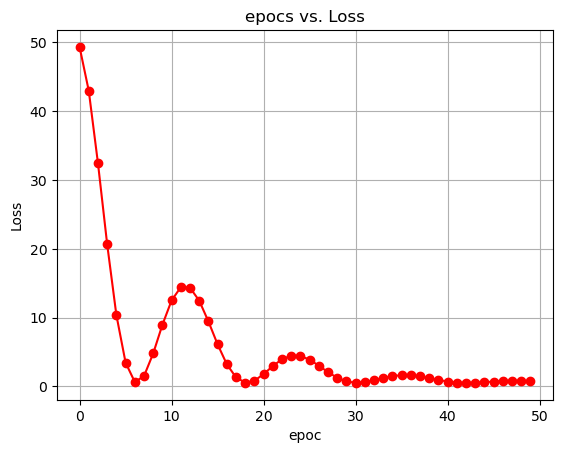

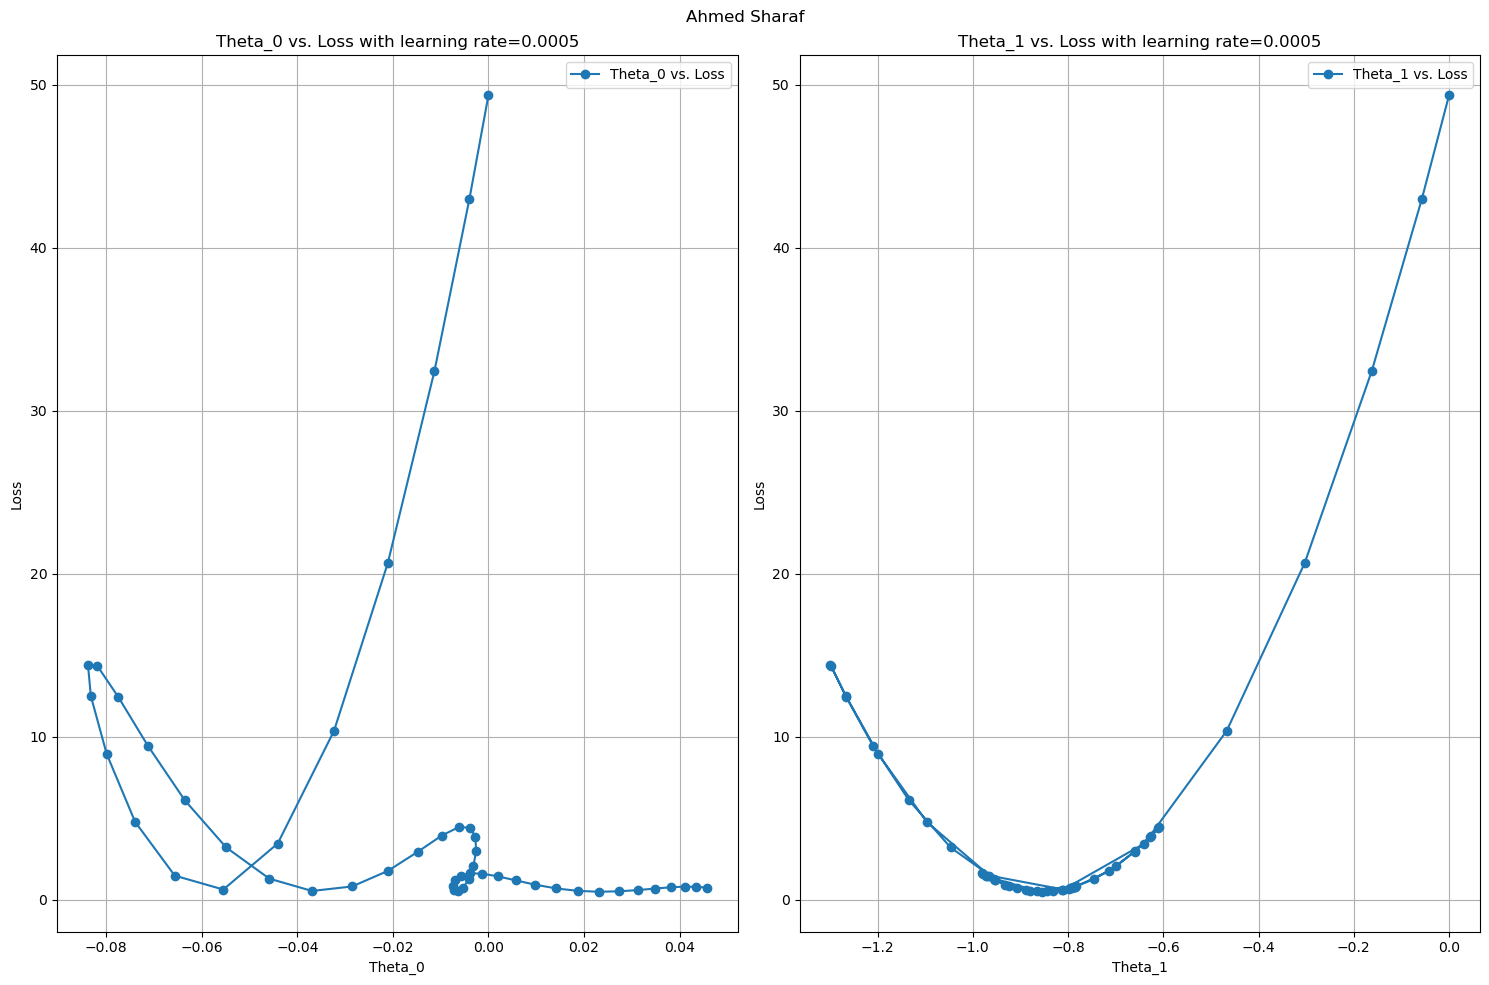

In [21]:
vis(X, y, y_pred, at0[:50], at1[:50], c[:50], 0.0005)

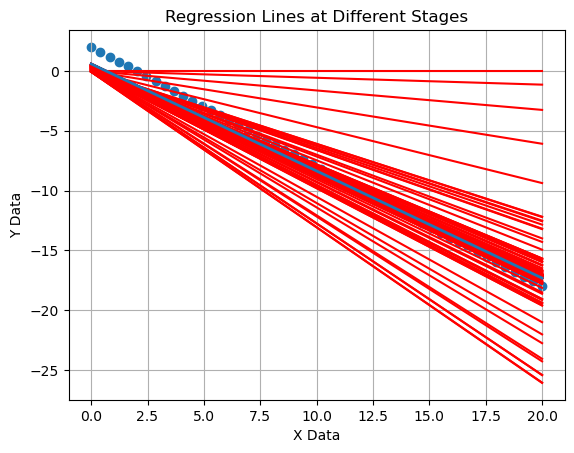

In [22]:
all_curve(X, y, at0, at1)

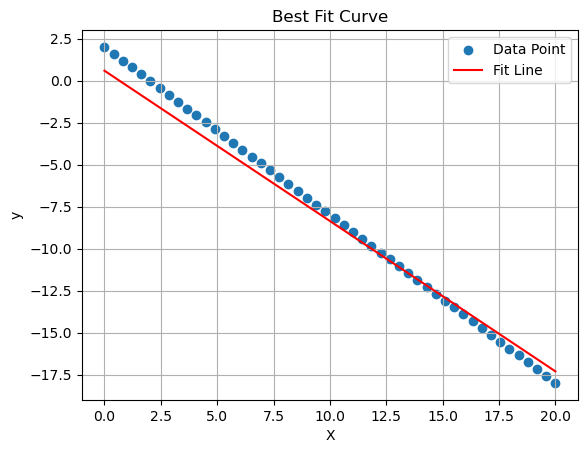

In [23]:
plt_best(X, y, y_pred)

###         2 - Implementation  NAG


In [24]:
def nag_GD(X, y, lr = 0.01, gamma = 0.9, itteration = 300):
    m = len(X)
    theta_0 = 0
    theta_1 = 0    
    losses = []
    all_theta_0 = []
    all_theta_1 = []
    
    m_t_0 = 0
    m_t_1 = 0
    
    for i in range(itteration):
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        
        h = theta_0 + theta_1 * X
        error_vector = h - y
        J = np.sum(error_vector ** 2) / (2 * m)
        losses.append(J)
        
        grad_0 = np.sum(error_vector) / m
        grad_1 = np.sum(error_vector * X) / m
        norm = np.linalg.norm(np.array([grad_0, grad_1]))
        if norm < 0.001 or ((i > 1) and (abs(losses[-2] - J) < 0.001)):
            break
        
        theta_t_0 = theta_0 - gamma * m_t_0
        theta_t_1 = theta_1 - gamma * m_t_1
        
        h = theta_t_0 + theta_t_1 * X
        d_theta_t_0 = np.sum((h - y)) / m
        d_theta_t_1 = np.sum((h - y) * X) / m
        
        m_t_0 = gamma * m_t_0 + lr * d_theta_t_0
        m_t_1 = gamma * m_t_1 + lr * d_theta_t_1
        
        theta_0 = theta_t_0 - lr * d_theta_t_0
        theta_1 = theta_t_1 - lr * d_theta_t_1

        
    return theta_0, theta_1, all_theta_0, all_theta_1, losses

## Example

In [25]:
t0, t1, at0, at1, c = nag_GD(X, y, lr = 0.0005, gamma = 0.9)
y_pred = t0 + t1 * X

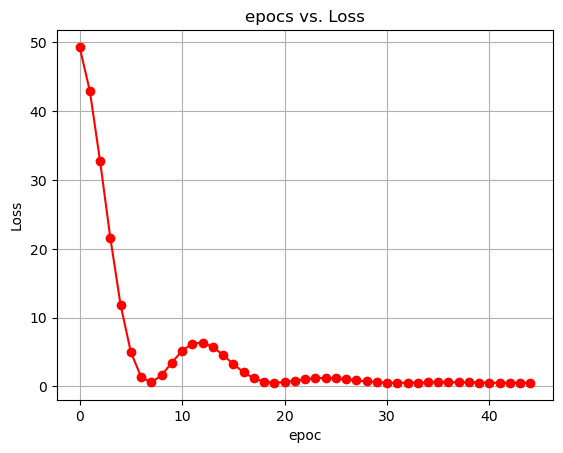

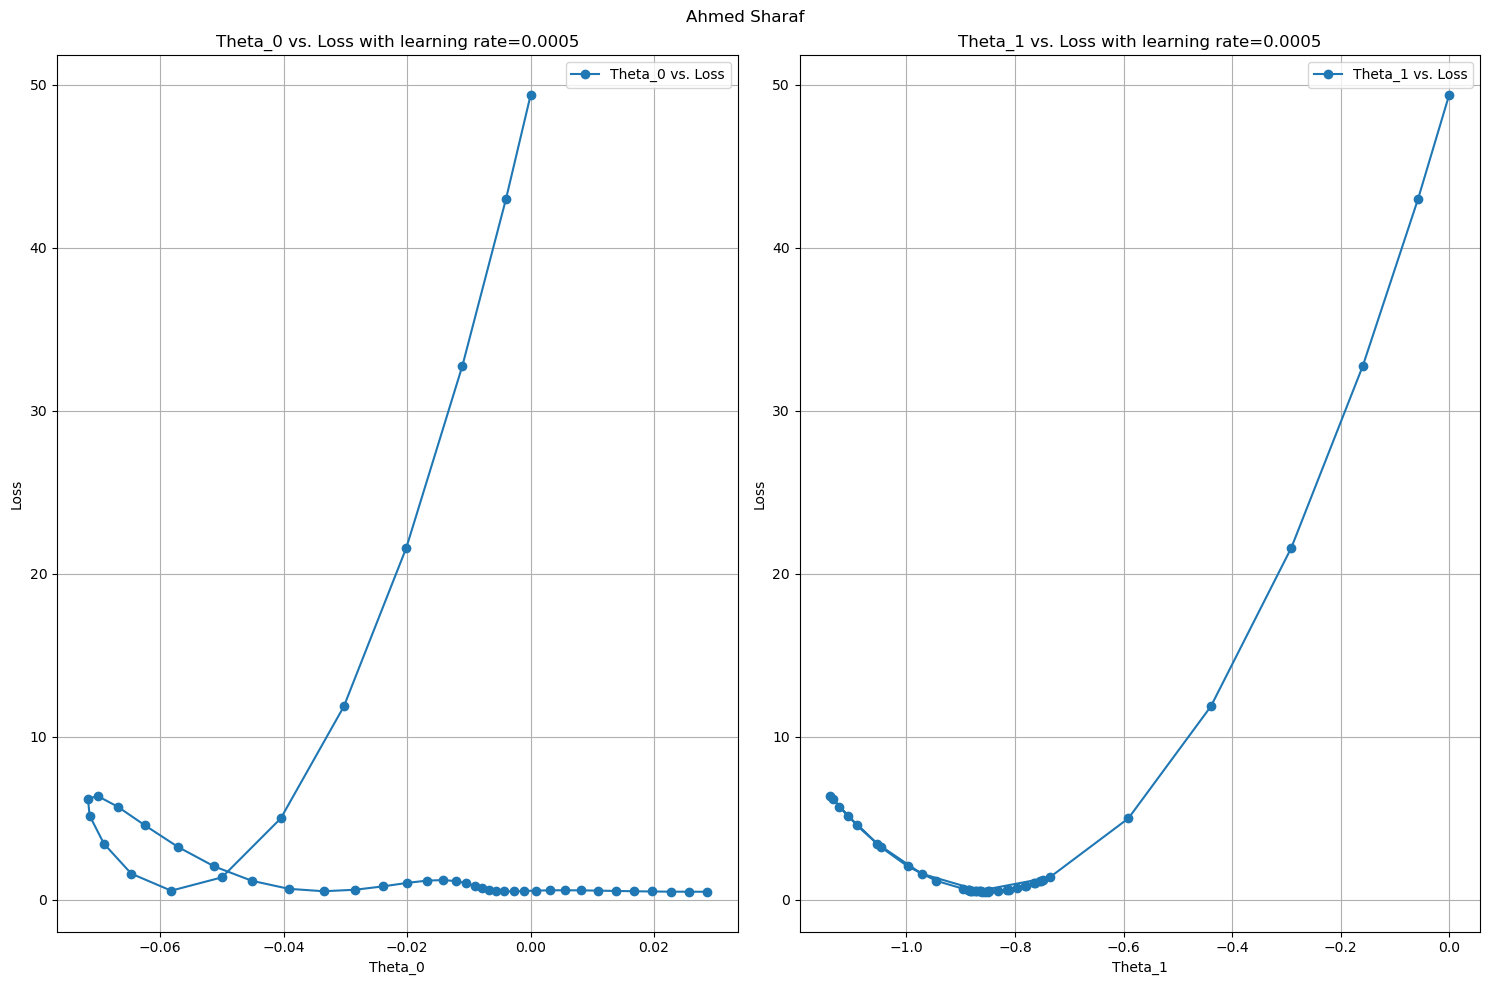

In [27]:
vis(X, y, y_pred, at0, at1, c, 0.0005)

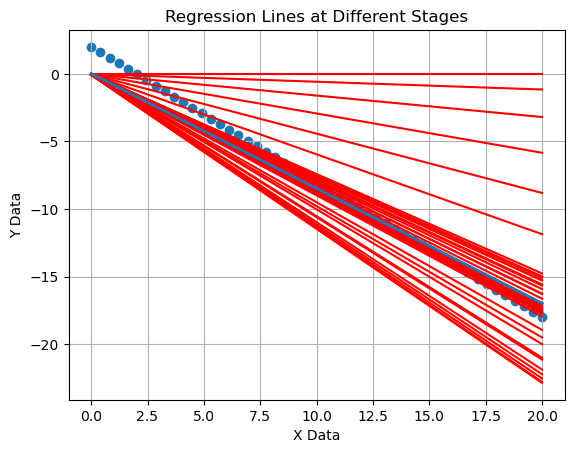

In [29]:
all_curve(X, y, at0, at1)

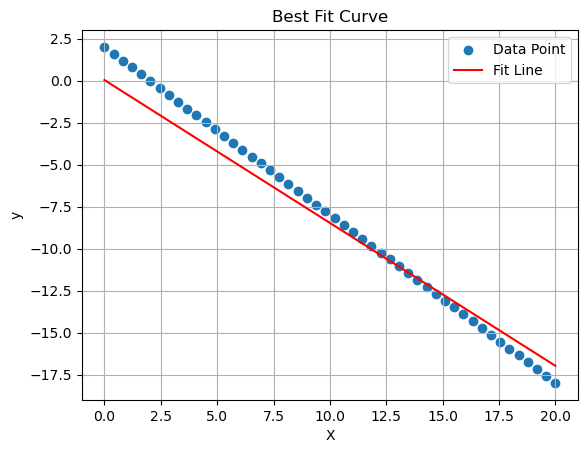

In [31]:
plt_best(X, y, y_pred)